# K-Nearest Neighbors (KNN) Classification on Iris Dataset

## Overview
This notebook demonstrates the implementation of the **K-Nearest Neighbors (KNN)** algorithm from scratch and its application to the **Iris dataset**. The dataset contains **150 samples** of three different species of Iris flowers (`Iris setosa`, `Iris virginica`, `Iris versicolor`) with **four features**:  
- **Sepal length**  
- **Sepal width**  
- **Petal length**  
- **Petal width**  

## Objectives
- Load and explore the **Iris dataset**.
- Perform **data cleaning** and **exploratory data analysis (EDA)**.
- Visualize data with **scatter plots**.
- Split data into **training** and **testing** sets.
- Implement **K-Nearest Neighbors (KNN) from scratch**.
- Evaluate model performance using **accuracy score**.

## Structure
1. **Import Libraries**  
2. **Load and Explore the Dataset**  
3. **Visualizations (Scatter Plots)**  
4. **Prepare Features (X) and Target (Y)**  
5. **Split Data into Training and Testing Sets**  
6. **Implement KNN from Scratch**  
7. **Train & Evaluate the Model**  
8. **Analyze Accuracy and Results**  

## Import Required Libraries
This cell imports essential libraries such as pandas, numpy, seaborn, matplotlib, and sklearn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

## Load and Inspect Data
This cell loads the Iris dataset and displays the first few rows to understand the structure.

In [2]:
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv("Iris.csv" , names = column_names , header = None)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


## Data Overview and Check for Missing Values and Duplicates
- Ensures data consistency by identifying null values and removing duplicates.
- Provides summary statistics and data types for better understanding.

In [3]:
df.shape

(151, 5)

In [4]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,151,151,151,151,151
unique,36,24,44,23,4
top,5.0,3.0,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Id to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  151 non-null    object
 1   SepalWidthCm   151 non-null    object
 2   PetalLengthCm  151 non-null    object
 3   PetalWidthCm   151 non-null    object
 4   Species        151 non-null    object
dtypes: object(5)
memory usage: 11.1+ KB


In [7]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
df.duplicated().sum()

np.int64(3)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Visualizing Feature Distributions
Plots pie , heatmap and scatter plots to analyze relationships between features.

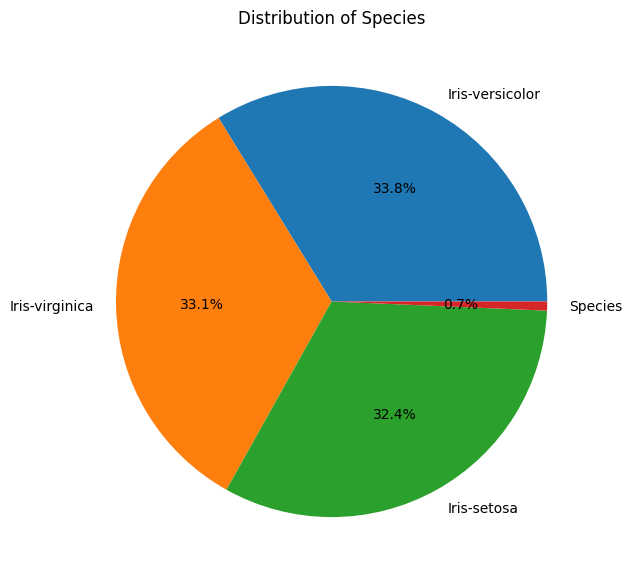

In [10]:
plt.figure(figsize=(10, 7))
plt.pie(df['Species'].value_counts(), labels=df['Species'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

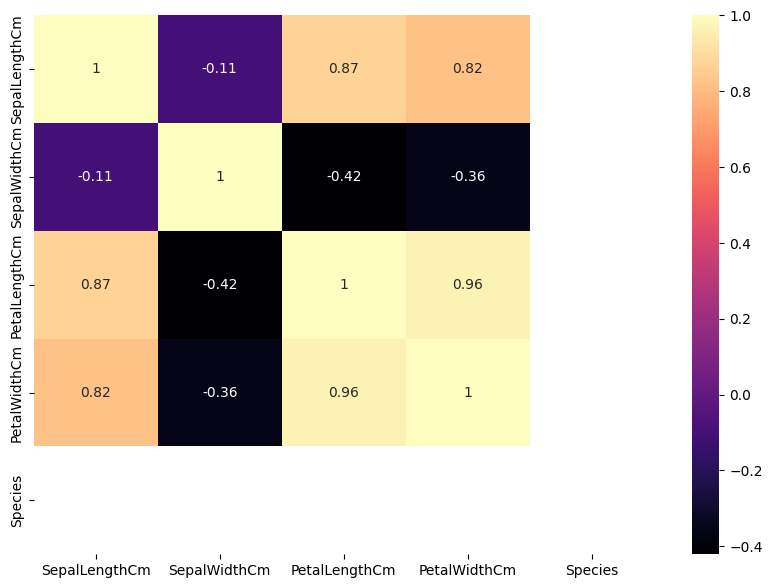

In [11]:
plt.figure(figsize=(10, 7))
# Convert columns to numeric if they are not already
df_numeric = df.apply(pd.to_numeric, errors='coerce').select_dtypes(include=[np.number])
sns.heatmap(data = df_numeric.corr(), annot=True, cmap='magma')
plt.show()

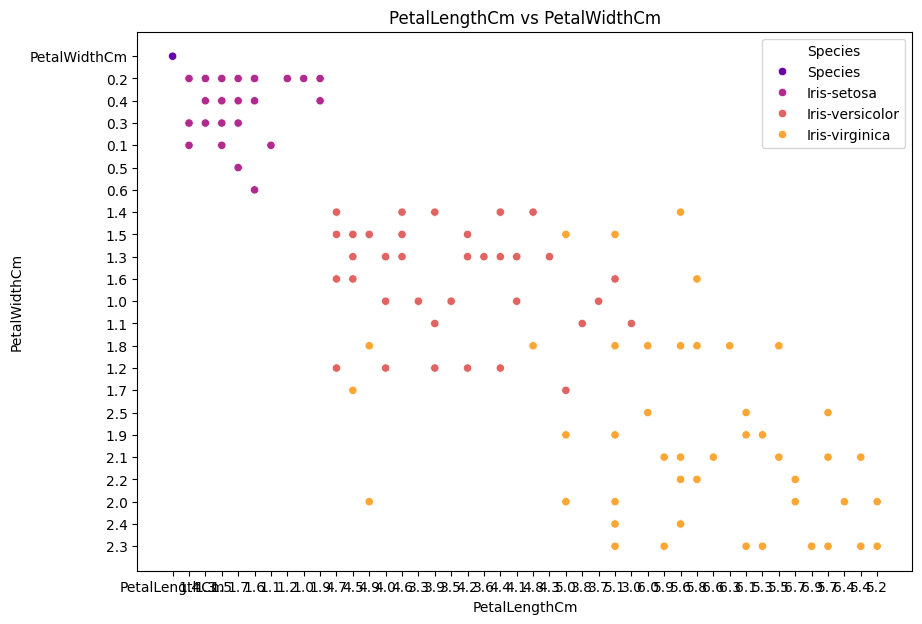

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='plasma')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('PetalLengthCm vs PetalWidthCm')
plt.legend(title="Species")
plt.show()


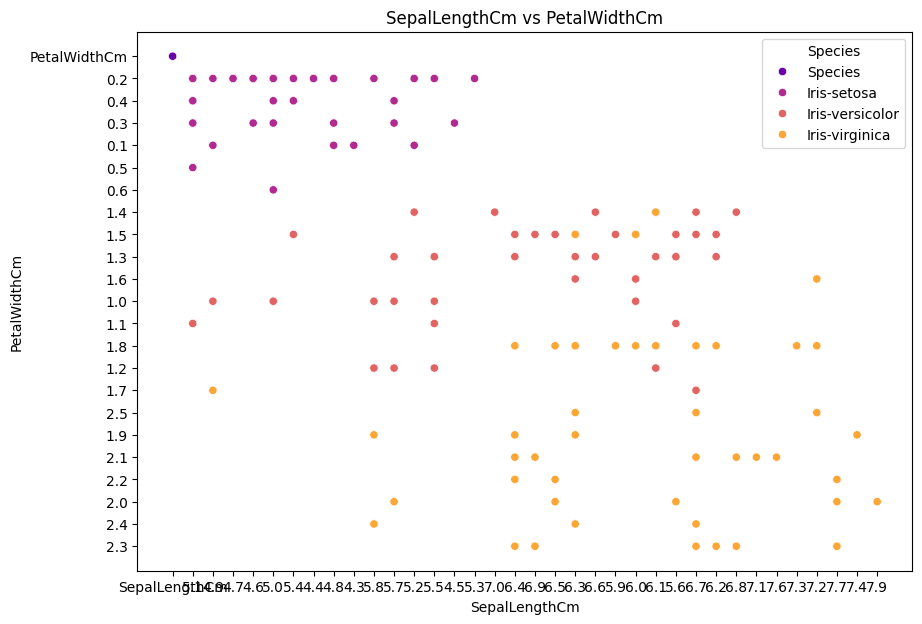

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalWidthCm', hue='Species', palette='plasma')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('SepalLengthCm vs PetalWidthCm')
plt.legend(title="Species")
plt.show()

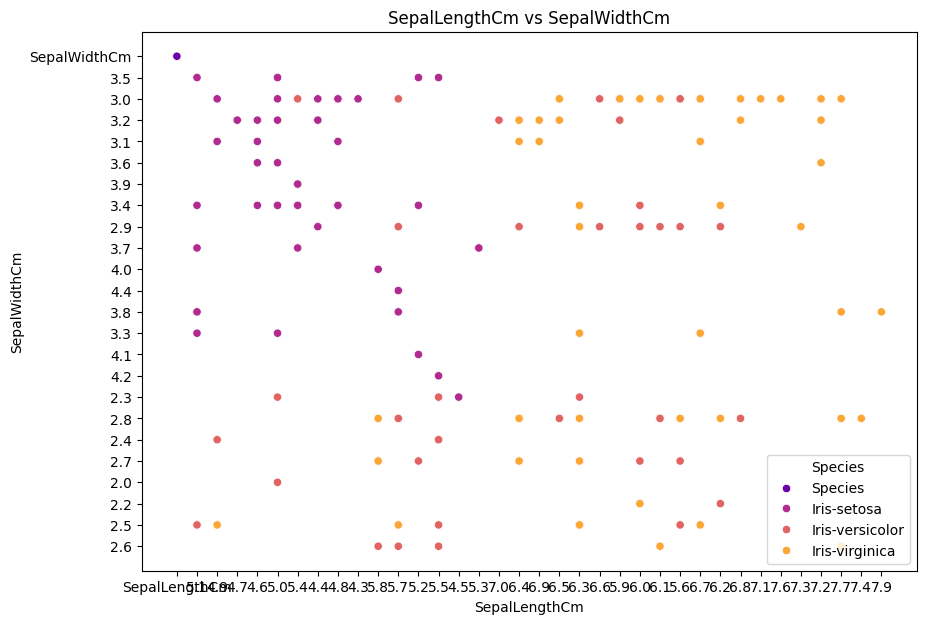

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='plasma')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('SepalLengthCm vs SepalWidthCm')
plt.legend(title="Species")
plt.show()

## Prepare Features (X) and Target (Y) and Splitting Data into Training and Testing Sets
- Separates independent variables (X) and dependent variable (Y).
- Divides the dataset into training (80%) and testing (20%) subsets.


In [15]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.2,2.8,4.8,1.8,Iris-virginica
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,6.7,3.1,5.6,2.4,Iris-virginica
3,5.7,3.8,1.7,0.3,Iris-setosa
4,7.6,3.0,6.6,2.1,Iris-virginica


In [16]:
X = df.drop(columns=['Species']).values
Y = df['Species'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Implement K-Nearest Neighbors (KNN) from Scratch
Defines the custom KNN algorithm with different distance metrics.

In [17]:
class KNN:
    # Initialize KNN with k neighbors and distance metric
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    # Compute Euclidean distance between two points
    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    # Compute Manhattan distance between two points
    def _manhattan_distance(self, a, b):
        return np.sum(np.abs(a - b))

    # Compute Cosine similarity between two vectors
    def _cosine_similarity(self, a, b):
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        return dot_product / (norm_a * norm_b)

    # Select appropriate distance function
    def _get_distance(self, a, b):
        if self.distance_metric == "euclidean":
            return self._euclidean_distance(a, b)
        elif self.distance_metric == "manhattan":
            return self._manhattan_distance(a, b)
        elif self.distance_metric == "cosine":
            return self._cosine_similarity(a, b)

    # Fit training data
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    # Predict labels for test data
    def predict(self, X_test):
        return [self._predict(x) for x in X_test]


    # Predict label for a single test point
    def _predict(self, x):
        distances = [self._get_distance(x, x_train) for x_train in self.X_train]

        if self.distance_metric == "cosine":
            k_indices = np.argsort(distances)[-self.k:]  # Select top k highest similarities
        else:
            k_indices = np.argsort(distances)[:self.k]  # Select top k smallest distances

        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


## Train and Evaluate KNN Model
Fits the model to the training data and evaluates it using accuracy score.

In [18]:
accuracy_scores = pd.DataFrame(columns=["K", "Distance Metric", "Accuracy % "])

In [19]:
knn = KNN(k=3, distance_metric="euclidean")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [3, "euclidean", accuracy]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
knn = KNN(k=5, distance_metric="euclidean")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [5, "euclidean", accuracy]

In [ ]:
knn = KNN(k=10, distance_metric="euclidean")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [10, "euclidean", accuracy]

In [ ]:
knn = KNN(k=3, distance_metric="manhattan")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [3, "manhattan", accuracy]

In [ ]:
knn = KNN(k=5, distance_metric="manhattan")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [5, "manhattan", accuracy]

In [ ]:
knn = KNN(k=10, distance_metric="manhattan")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [10, "manhattan", accuracy]

In [ ]:
knn = KNN(k=3, distance_metric="cosine")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [3, "cosine", accuracy]

In [ ]:
knn = KNN(k=5, distance_metric="cosine")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [5, "cosine", accuracy]

In [ ]:
knn = KNN(k=10, distance_metric="cosine")
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)*100
print(f"Accuracy:{accuracy}%")
accuracy_scores.loc[len(accuracy_scores)] = [10, "cosine", accuracy]

## Analyzing Predictions and Accuracy
Displays accuracy and analyzes correct vs incorrect predictions.

In [ ]:
print(accuracy_scores.to_string(index=False))